<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import keras
from keras.models import load_model

from skimage.io import imshow, imread
from skimage.color import rgb2grey

Using TensorFlow backend.


In [2]:
BB_CAPTURE_PATH = '../bb_capture_output/'
TABLE_PATH = '../data/taiku_tables/'

IMG_ROWS, IMG_COLS = 15, 10

In [3]:
folders = next(os.walk(BB_CAPTURE_PATH))[1]
folders.sort()
folders

['bb_capture.capture_2018_03_27_11_53_08',
 'bb_capture.capture_2018_03_27_11_55_29',
 'bb_capture.capture_2018_03_27_11_57_53',
 'bb_capture.capture_2018_03_27_12_27_53',
 'bb_capture.capture_2018_03_27_12_30_18',
 'bb_capture.capture_2018_03_27_12_32_45',
 'bb_capture.capture_2018_03_27_12_35_45',
 'bb_capture.capture_2018_03_27_12_38_33',
 'bb_capture.capture_2018_03_27_12_41_25',
 'bb_capture.capture_2018_03_27_12_44_52',
 'bb_capture.capture_2018_03_27_12_46_54',
 'bb_capture.capture_2018_03_27_12_49_02',
 'bb_capture.capture_2018_03_27_12_51_07',
 'bb_capture.capture_2018_03_27_13_28_02',
 'bb_capture.capture_2018_03_27_13_30_23',
 'bb_capture.capture_2018_03_27_13_32_32',
 'bb_capture.capture_2018_03_27_13_34_43',
 'bb_capture.capture_2018_03_27_13_37_06',
 'bb_capture.capture_2018_03_27_13_39_31',
 'bb_capture.capture_2018_03_27_13_43_06',
 'bb_capture.capture_2018_03_27_13_46_01',
 'bb_capture.capture_2018_03_27_13_48_54',
 'bb_capture.capture_2018_03_27_13_52_15',
 'bb_captur

In [4]:
folders[0]

'bb_capture.capture_2018_03_27_11_53_08'

In [5]:
play_df = pd.read_csv(TABLE_PATH + 'taiko_play.csv')
tmp_df = pd.read_csv(TABLE_PATH + 'taiko_song.csv', dtype={
    'song_length': np.int16
})

play_df = play_df.merge(tmp_df, how='left', left_on='song_id', right_on='song_id')

play_df

,pid,drummer_id,song_id,performance_order,start_time,first_hit_time,song_name,song_length
0,1,1,1,1,3/27/2018 11:53:08,1.522123e+09,夢をかなえてドラえもん,88
1,2,1,1,2,3/27/2018 11:55:29,1.522123e+09,夢をかなえてドラえもん,88
2,3,1,1,3,3/27/2018 11:57:53,1.522123e+09,夢をかなえてドラえもん,88
3,4,1,2,1,3/27/2018 12:27:53,1.522125e+09,ウィーアー！,120
4,5,1,2,2,3/27/2018 12:30:18,1.522125e+09,ウィーアー！,120
5,6,1,2,3,3/27/2018 12:32:45,1.522125e+09,ウィーアー！,120
6,7,1,3,1,3/27/2018 12:35:45,1.522125e+09,六兆年と一夜物語\n,150
7,8,1,3,2,3/27/2018 12:38:33,1.522126e+09,六兆年と一夜物語\n,150
8,9,1,3,3,3/27/2018 12:41:25,1.522126e+09,六兆年と一夜物語\n,150
9,10,1,4,1,3/27/2018 12:44:52,1.522126e+09,残酷な天使のテーゼ,90


In [6]:
row = play_df[play_df['song_id'] == 1]
row = row[(row['drummer_id'] == 1) & (row['performance_order'] == 3)]

row = row.iloc[0]
d = datetime.strptime(row['start_time'], '%m/%d/%Y %H:%M:%S')
directory = d.strftime('bb_capture.capture_%Y_%m_%d_%H_%M_%S')
score_start_time = float(row['first_hit_time']) - 1
score_end_time = score_start_time + row['song_length'] + 1

print('score_start_time:', score_start_time)
print('score_end_time:', score_end_time)

score_start_time: 1522123084.22
score_end_time: 1522123173.22


In [7]:
model = load_model('model/mnist_model.h5')

X_ANCHOR = 180
Y_ANCHOR = 40
DIGIT_COUNTS = 6

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
workspace = '../bb_capture_output/' + directory + '/'
files = next(os.walk(workspace))[2]
files.sort()
files

['0000-1522123073.441851.png',
 '0001-1522123073.7340696.png',
 '0002-1522123073.9899712.png',
 '0003-1522123074.1476753.png',
 '0004-1522123074.3258905.png',
 '0005-1522123074.4849765.png',
 '0006-1522123074.7149036.png',
 '0007-1522123074.8708847.png',
 '0008-1522123075.0419018.png',
 '0009-1522123075.200028.png',
 '0010-1522123075.3826025.png',
 '0011-1522123075.5423028.png',
 '0012-1522123075.7602715.png',
 '0013-1522123075.9172928.png',
 '0014-1522123076.0754821.png',
 '0015-1522123076.2562127.png',
 '0016-1522123076.4193413.png',
 '0017-1522123076.5880792.png',
 '0018-1522123076.7625706.png',
 '0019-1522123076.9327452.png',
 '0020-1522123077.096749.png',
 '0021-1522123077.2923455.png',
 '0022-1522123077.463503.png',
 '0023-1522123077.6656358.png',
 '0024-1522123077.8490973.png',
 '0025-1522123078.0194757.png',
 '0026-1522123078.1846287.png',
 '0027-1522123078.3418708.png',
 '0028-1522123078.5289776.png',
 '0029-1522123078.6899345.png',
 '0030-1522123078.8799553.png',
 '0031-15221

In [9]:
# retrive first and last
score_start_frame = -1
score_end_frame = -1
for id_, filename in enumerate(files):
    frametime = float(filename[5: -4])
    if frametime <= score_start_time:
        score_start_frame = id_
    if frametime <= score_end_time:
        score_end_frame = id_
        
print('score_start_frame:', score_start_frame)
print('score_end_frame:', score_end_frame)

score_start_frame: 62
score_end_frame: 688


6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10 10 10 10  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  1  8  0]
6/6 [==============================] - 0s
[10 10  1  7  7  0]
6/6 [===

6/6 [==============================] - 0s
[10  2  9  0  6  0]
6/6 [==============================] - 0s
[10  3  1  0  0  0]
6/6 [==============================] - 0s
[10  3  1  0  0  0]
6/6 [==============================] - 0s
[10  3  1  0  0  0]
6/6 [==============================] - 0s
[10  3  1  0  0  0]
6/6 [==============================] - 0s
[10  3  2  9  4  0]
6/6 [==============================] - 0s
[10  3  2  9  4  0]
6/6 [==============================] - 0s
[10  3  2  9  4  0]
6/6 [==============================] - 0s
[10  3  2  9  4  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [==============================] - 0s
[10  3  4  8  8  0]
6/6 [===

6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  5  9  5  0]
6/6 [==============================] - 0s
[10  8  6  1  5  0]
6/6 [==============================] - 0s
[10  8  6  2  5  0]
6/6 [==============================] - 0s
[10  8  6  4  5  0]
6/6 [==============================] - 0s
[10  8  6  6  5  0]
6/6 [==============================] - 0s
[10  8  6  8  5  0]
6/6 [==============================] - 0s
[10  8  6  9  5  0]
6/6 [===

6/6 [==============================] - 0s
[1 0 4 7 2 0]
6/6 [==============================] - 0s
[1 0 4 7 2 0]
6/6 [==============================] - 0s
[1 0 6 1 3 0]
6/6 [==============================] - 0s
[1 0 6 1 3 0]
6/6 [==============================] - 0s
[1 0 6 1 3 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 7 5 4 0]
6/6 [==============================] - 0s
[1 0 8 2 4 0]
6/6 [==============================] - 0s
[1 0 8 2 4 0]
6/6 [==============================] - 0s
[1 0 8

6/6 [==============================] - 0s
[1 4 2 8 9 0]
6/6 [==============================] - 0s
[1 4 2 8 9 0]
6/6 [==============================] - 0s
[1 4 2 8 9 0]
6/6 [==============================] - 0s
[1 4 2 8 9 0]
6/6 [==============================] - 0s
[1 4 5 2 1 0]
6/6 [==============================] - 0s
[1 4 5 2 1 0]
6/6 [==============================] - 0s
[1 4 5 2 1 0]
6/6 [==============================] - 0s
[1 4 6 3 7 0]
6/6 [==============================] - 0s
[1 4 6 3 7 0]
6/6 [==============================] - 0s
[1 4 6 3 7 0]
6/6 [==============================] - 0s
[1 4 6 3 7 0]
6/6 [==============================] - 0s
[1 4 8 6 9 0]
6/6 [==============================] - 0s
[1 4 8 6 9 0]
6/6 [==============================] - 0s
[1 4 8 6 9 0]
6/6 [==============================] - 0s
[1 4 8 6 9 0]
6/6 [==============================] - 0s
[1 4 8 6 9 0]
6/6 [==============================] - 0s
[1 4 8 6 9 0]
6/6 [==============================] - 0s
[1 5 1

/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


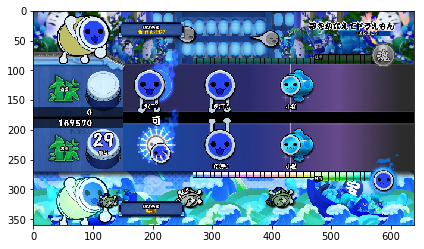

6/6 [==============================] - 0s
[1 6 9 5 7 0]


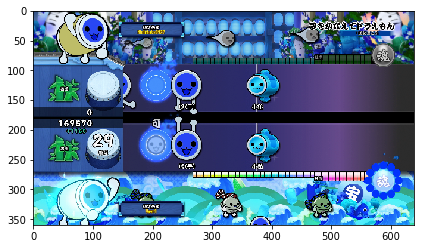

6/6 [==============================] - 0s
[1 6 9 5 7 0]


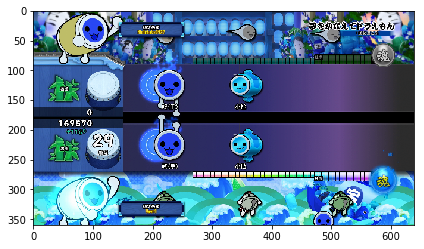

6/6 [==============================] - 0s
[1 6 9 5 7 0]


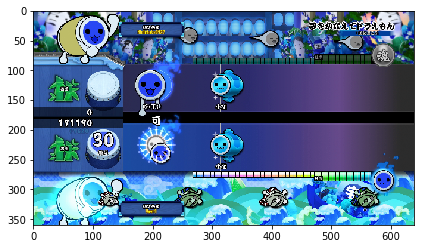

6/6 [==============================] - 0s
[1 7 1 1 9 0]


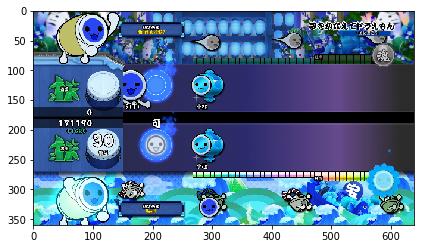

6/6 [==============================] - 0s
[1 7 1 1 9 0]


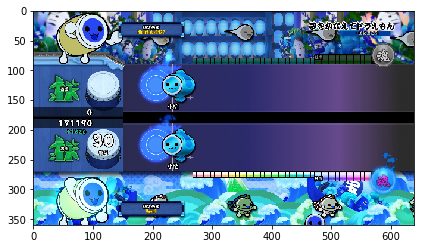

6/6 [==============================] - 0s
[1 7 1 1 9 0]


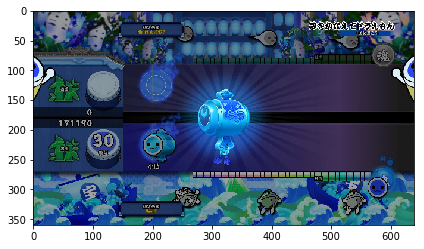

6/6 [==============================] - 0s
[1 7 1 1 9 0]


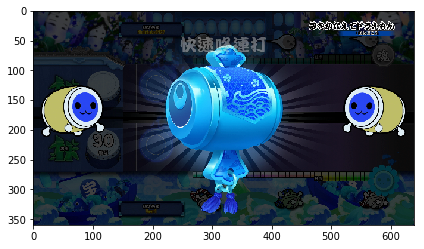

6/6 [==============================] - 0s
[4 4 8 8 8 4]


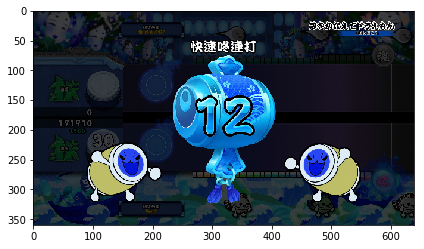

6/6 [==============================] - 0s
[10 10 10 10 10 10]


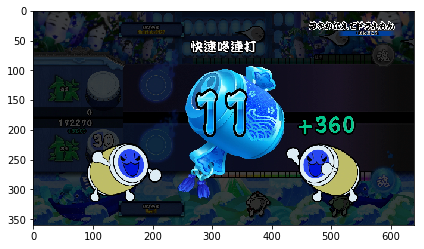

6/6 [==============================] - 0s
[10 10 10 10 10 10]


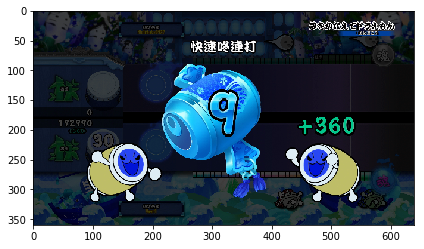

6/6 [==============================] - 0s
[10 10 10 10 10 10]


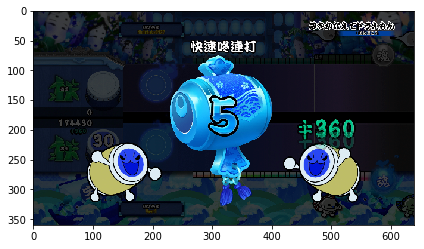

6/6 [==============================] - 0s
[10 10 10 10 10 10]


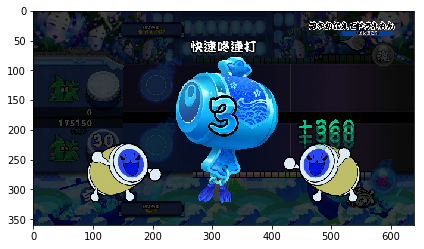

6/6 [==============================] - 0s
[10 10 10 10 10 10]


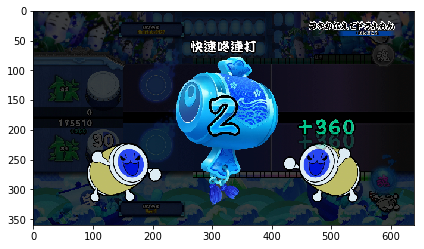

6/6 [==============================] - 0s
[10 10 10 10 10 10]


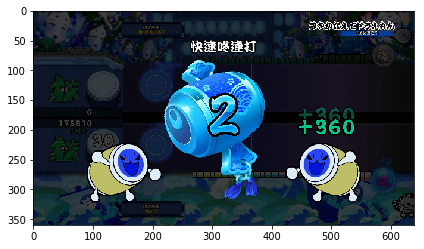

6/6 [==============================] - 0s
[10 10 10 10 10 10]


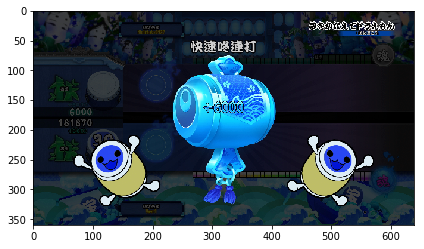

6/6 [==============================] - 0s
[10 10 10 10 10 10]


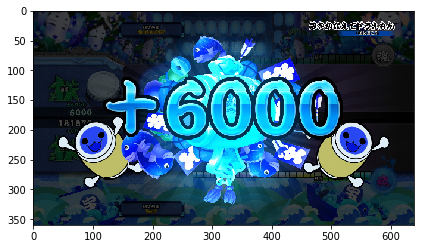

6/6 [==============================] - 0s
[10 10 10 10 10  2]


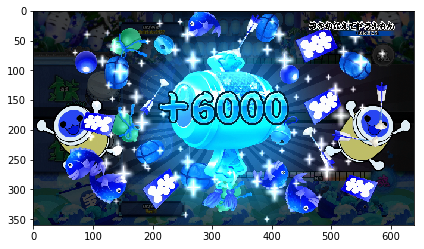

6/6 [==============================] - 0s
[10 10 10 10  0  4]


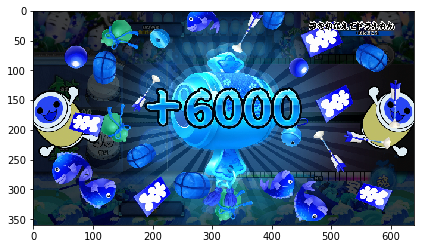

6/6 [==============================] - 0s
[7 0 0 7 0 7]


In [10]:
all_scores = []
for id_, filename in enumerate(files[score_start_frame:score_end_frame]):
    img = imread(workspace + filename)
    
    if id_ > score_end_frame - score_start_frame - 20:
        imshow(img)
        plt.show()
    digits = []
    for digit in range(DIGIT_COUNTS):
        cropped = img[X_ANCHOR:X_ANCHOR + IMG_ROWS, Y_ANCHOR +
                      IMG_COLS * digit:Y_ANCHOR + IMG_COLS * (digit + 1)]
        cropped = rgb2grey(cropped)
        digits.append(cropped)
        
    digits = np.asarray(digits)
    digits = digits.reshape(digits.shape[0], IMG_ROWS, IMG_COLS, 1)
    scores = model.predict_classes(digits)
    print(scores)
    all_scores.extend(scores)

In [11]:
img_scores = [0]
for k in range(0, len(all_scores), DIGIT_COUNTS):
    score = 0 

    broken = False
    leading_space = True
    for d in all_scores[k: k + DIGIT_COUNTS]:
        if d == 10:
            d = 0
            if not leading_space:
                broken = True
        else:
            leading_space = False
        score = score * 10 + d

    if score < img_scores[-1] or broken:
        score = img_scores[-1]
    
    img_scores.append(score)

Text(0.5,1,'Score, (Player1_Mon1)')

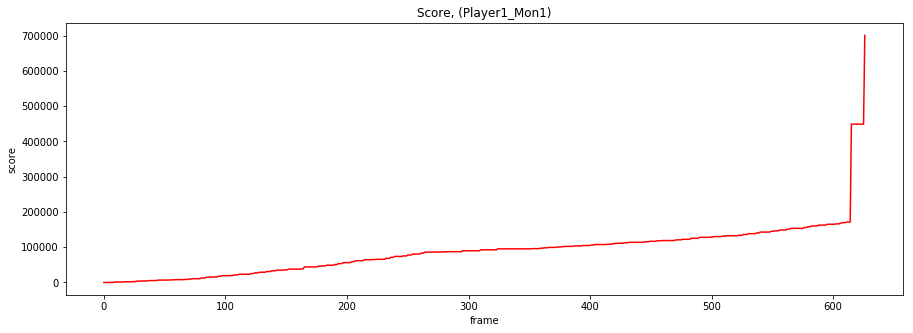

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(img_scores, 'r')

plt.xlabel('frame')
plt.ylabel('score') 
plt.title("Score, (Player1_Mon1)")